# Linear Regression with Spark MLlib

In [1]:
from sklearn import datasets
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StringIndexer
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
boston = datasets.load_boston()

df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['price'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
sdf = sqlContext.createDataFrame(df)
sdf.show(truncate=False)

+-------+----+-----+----+-----+-----+-----+------+---+-----+-------+------+-----+-----+
|CRIM   |ZN  |INDUS|CHAS|NOX  |RM   |AGE  |DIS   |RAD|TAX  |PTRATIO|B     |LSTAT|price|
+-------+----+-----+----+-----+-----+-----+------+---+-----+-------+------+-----+-----+
|0.00632|18.0|2.31 |0.0 |0.538|6.575|65.2 |4.09  |1.0|296.0|15.3   |396.9 |4.98 |24.0 |
|0.02731|0.0 |7.07 |0.0 |0.469|6.421|78.9 |4.9671|2.0|242.0|17.8   |396.9 |9.14 |21.6 |
|0.02729|0.0 |7.07 |0.0 |0.469|7.185|61.1 |4.9671|2.0|242.0|17.8   |392.83|4.03 |34.7 |
|0.03237|0.0 |2.18 |0.0 |0.458|6.998|45.8 |6.0622|3.0|222.0|18.7   |394.63|2.94 |33.4 |
|0.06905|0.0 |2.18 |0.0 |0.458|7.147|54.2 |6.0622|3.0|222.0|18.7   |396.9 |5.33 |36.2 |
|0.02985|0.0 |2.18 |0.0 |0.458|6.43 |58.7 |6.0622|3.0|222.0|18.7   |394.12|5.21 |28.7 |
|0.08829|12.5|7.87 |0.0 |0.524|6.012|66.6 |5.5605|5.0|311.0|15.2   |395.6 |12.43|22.9 |
|0.14455|12.5|7.87 |0.0 |0.524|6.172|96.1 |5.9505|5.0|311.0|15.2   |396.9 |19.15|27.1 |
|0.21124|12.5|7.87 |0.0 |0.524|5

In [4]:
assembler = VectorAssembler(inputCols=[c for c in sdf.columns if c != 'price'],
                            outputCol='features')
dataset = assembler.transform(sdf)
dataset.show(truncate=False)

+-------+----+-----+----+-----+-----+-----+------+---+-----+-------+------+-----+-----+----------------------------------------------------------------------------+
|CRIM   |ZN  |INDUS|CHAS|NOX  |RM   |AGE  |DIS   |RAD|TAX  |PTRATIO|B     |LSTAT|price|features                                                                    |
+-------+----+-----+----+-----+-----+-----+------+---+-----+-------+------+-----+-----+----------------------------------------------------------------------------+
|0.00632|18.0|2.31 |0.0 |0.538|6.575|65.2 |4.09  |1.0|296.0|15.3   |396.9 |4.98 |24.0 |[0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98]     |
|0.02731|0.0 |7.07 |0.0 |0.469|6.421|78.9 |4.9671|2.0|242.0|17.8   |396.9 |9.14 |21.6 |[0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14]    |
|0.02729|0.0 |7.07 |0.0 |0.469|7.185|61.1 |4.9671|2.0|242.0|17.8   |392.83|4.03 |34.7 |[0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03]   |
|0.03237|0

In [5]:
dataset.select("features").show(truncate=False)

+----------------------------------------------------------------------------+
|features                                                                    |
+----------------------------------------------------------------------------+
|[0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98]     |
|[0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14]    |
|[0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03]   |
|[0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94]   |
|[0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.9,5.33]    |
|[0.02985,0.0,2.18,0.0,0.458,6.43,58.7,6.0622,3.0,222.0,18.7,394.12,5.21]    |
|[0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.6,12.43]  |
|[0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.9,19.15]  |
|[0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93]|
|[0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,

In [6]:
dataset.cache() # <---

DataFrame[CRIM: double, ZN: double, INDUS: double, CHAS: double, NOX: double, RM: double, AGE: double, DIS: double, RAD: double, TAX: double, PTRATIO: double, B: double, LSTAT: double, price: double, features: vector]

In [7]:
lr = LinearRegression(featuresCol='features', labelCol='price')
model = lr.fit(dataset)

## Importance of Individual Features

In [8]:
model.coefficients

DenseVector([-0.108, 0.0464, 0.0206, 2.6867, -17.7666, 3.8099, 0.0007, -1.4756, 0.306, -0.0123, -0.9527, 0.0093, -0.5248])

In [9]:
assembler.getInputCols()

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

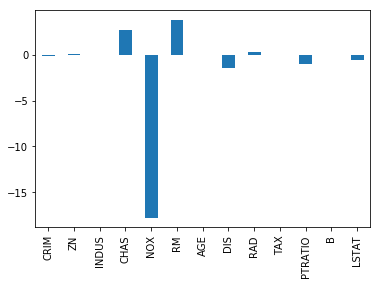

In [10]:
pd.Series(np.array(model.coefficients), index=assembler.getInputCols()).plot(kind='bar')

# Getting Metrics

In [11]:
summary = model.evaluate(dataset)
summary.r2

0.7406426641094095

In [12]:
summary.explainedVariance

62.52472497443687

## Training on a subset of the data

In [13]:
subset = sdf.select("CHAS", "NOX", "RM", "price")
assembler = VectorAssembler(inputCols=[c for c in subset.columns if c != 'price'],
                            outputCol='features')
small_dataset = assembler.transform(subset)
small_dataset.show()

+----+-----+-----+-----+-----------------+
|CHAS|  NOX|   RM|price|         features|
+----+-----+-----+-----+-----------------+
| 0.0|0.538|6.575| 24.0|[0.0,0.538,6.575]|
| 0.0|0.469|6.421| 21.6|[0.0,0.469,6.421]|
| 0.0|0.469|7.185| 34.7|[0.0,0.469,7.185]|
| 0.0|0.458|6.998| 33.4|[0.0,0.458,6.998]|
| 0.0|0.458|7.147| 36.2|[0.0,0.458,7.147]|
| 0.0|0.458| 6.43| 28.7| [0.0,0.458,6.43]|
| 0.0|0.524|6.012| 22.9|[0.0,0.524,6.012]|
| 0.0|0.524|6.172| 27.1|[0.0,0.524,6.172]|
| 0.0|0.524|5.631| 16.5|[0.0,0.524,5.631]|
| 0.0|0.524|6.004| 18.9|[0.0,0.524,6.004]|
| 0.0|0.524|6.377| 15.0|[0.0,0.524,6.377]|
| 0.0|0.524|6.009| 18.9|[0.0,0.524,6.009]|
| 0.0|0.524|5.889| 21.7|[0.0,0.524,5.889]|
| 0.0|0.538|5.949| 20.4|[0.0,0.538,5.949]|
| 0.0|0.538|6.096| 18.2|[0.0,0.538,6.096]|
| 0.0|0.538|5.834| 19.9|[0.0,0.538,5.834]|
| 0.0|0.538|5.935| 23.1|[0.0,0.538,5.935]|
| 0.0|0.538| 5.99| 17.5| [0.0,0.538,5.99]|
| 0.0|0.538|5.456| 20.2|[0.0,0.538,5.456]|
| 0.0|0.538|5.727| 18.2|[0.0,0.538,5.727]|
+----+-----

In [14]:
lr = LinearRegression(featuresCol='features', labelCol='price')
small_model = lr.fit(small_dataset)
summary = small_model.evaluate(small_dataset)

In [15]:
summary.r2

0.5555737130590869

In [16]:
summary.explainedVariance

46.90128626848139

## Exercise: Fit a Linear Regression on the Diabetes Dataset
### Step 1: Create a spark DataFrame, and prepare the dataset
### Step 2: Find the R2 score and explained variance
### Step 3: Find a subset of features with the highest absolute coefficients (by plotting)
### Step 4: Train a new model on this subset, and find R2 and explained variance

In [23]:
# Step 1
diabetes = datasets.load_diabetes()
# complete code below
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['y'] = diabetes.target
df = spark.createDataFrame(df)
assembler = VectorAssembler(inputCols=[c for c in df.columns if c!='y'], outputCol='features')
dataset = assembler.transform(df)

In [25]:
# Step 2 - complete code below
lr = LinearRegression(featuresCol='features', labelCol='y')
model = lr.fit(dataset)
summary = model.evaluate(dataset)
print(summary.r2, summary.explainedVariance)

0.5177494254132935 3070.1944981423203


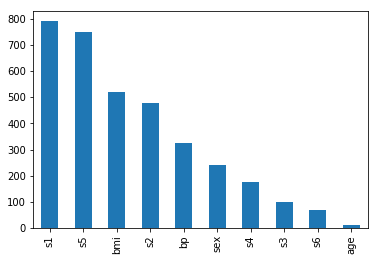

In [26]:
# Step 3:
pd.Series(model.coefficients, index=assembler.getInputCols()).abs().sort_values(ascending=False).plot(kind='bar')

In [27]:
# Step 4 - complete code below
subset = dataset.select("s1", "s5", "bmi", "s2", "y")
assembler = VectorAssembler(inputCols=[c for c in subset.columns if c!='y'], outputCol='features')
small_dataset = assembler.transform(subset)

lr = LinearRegression(featuresCol='features', labelCol='y')
model = lr.fit(small_dataset)
summary = model.evaluate(small_dataset)
print(summary.r2, summary.explainedVariance)

0.4764751603914341 2825.4428573581245
